# Machine Learning Pretest
## First Part: Multiple Choices
## https://goo.gl/forms/L3L2RH9NMQtGPe4I2

## Second Part: Coding Exercise

## Exercise 1
### Simulate N coin flips and count number of head and number of tail

In [1]:
import numpy as np
def simulate_coin_flips(N, p):
    head = 0; tail = 0
    for r in np.random.choice(2, N, p=p):
        if r == 0: head += 1
        else: tail += 1
    return head, tail

## Exercise 2
### Write a program to simulate data and answer this question: How many coin flips on average does it take to get n consecutive heads?

In [2]:
import numpy as np
def average_coin_flips_until_n_heads(n, p):
    count = 0
    head = 0
    while True:
        count += 1
        r = np.random.choice(2, 1, p=p)
        if r == 0: head += 1
        else: head = 0
        if head == n: 
            break
    return count

## Exercise 3
### Fit linear regression on the simulated data below and show that the fitted parameters are correct

In [3]:
import numpy as np

x = np.random.normal(size=(100,2))
y = 4 + 3 * x[:,0] + 5 * x[:,1]

In [4]:
 m, c = np.linalg.lstsq(x, y)[0]

## Exercise 4
### Given credit card fraud data below, fit a classification model on the trainData and evaluate the model on the testData using Area under curve of ROC (AUC) as a metric
### The label column is "Class" and other columns are anonymized features
### The data is sample from this dataset: https://www.kaggle.com/dalpozz/creditcardfraud

In [15]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [16]:
trainData = pd.read_csv("trainData.csv")

In [17]:
testData = pd.read_csv("testData.csv")

In [18]:
features = list(trainData.columns[:-1])
X = trainData.loc[:, features]
Y = trainData.loc[:, ['Class']]

clf = svm.SVC()
clf.fit(X, Y)  

XTest = testData.loc[:, features]
YTest = testData.loc[:, ['Class']]
yTest = list(YTest['Class'])

yPredict = clf.predict(XTest)
fpr, tpr, _ = roc_curve(yTest[:], yPredict[:])
roc_auc = auc(fpr, tpr)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


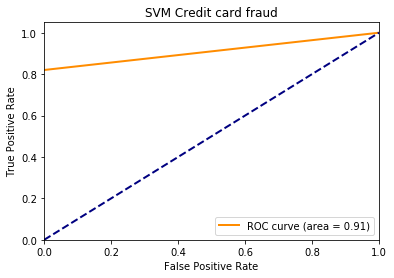

In [19]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Credit card fraud')
plt.legend(loc="lower right")
plt.show()
